# Sorting and Ranking in Pandas

In [2]:
import pandas as pd

# Sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [24, 27, 22, 32, 29],
    'Score': [85, 90, 88, 76, 95],
    'City': ['Delhi', 'Paris', 'Delhi', 'Berlin', 'Paris']
}

df = pd.DataFrame(data)

# 1. Sort by one column (Age ascending)
sort_age = df.sort_values('Age')

# 2. Sort by one column (Score descending)
sort_score_desc = df.sort_values('Score', ascending=False)

# 3. Sort by multiple columns (City ascending, Score descending)
sort_multi = df.sort_values(['City', 'Score'], ascending=[True, False])

# 4. Sort columns (not rows) alphabetically
sort_columns = df.sort_index(axis=1)

# 5. Get top 3 scores
top3 = df.nlargest(3, 'Score')

# 6. Get 2 lowest ages
bottom2 = df.nsmallest(2, 'Age')

# 7. Ranking scores (highest score gets rank 1)
df['Score_Rank'] = df['Score'].rank(method='dense', ascending=False)

# Print results
print("Original DataFrame:\n", df)
print("\nSorted by Age:\n", sort_age)
print("\nSorted by Score Descending:\n", sort_score_desc)
print("\nSorted by City and Score:\n", sort_multi)
print("\nSorted Columns Alphabetically:\n", sort_columns)
print("\nTop 3 Scores:\n", top3)
print("\nBottom 2 Ages:\n", bottom2)
print("\nDataFrame with Score Ranking:\n", df)


Original DataFrame:
       Name  Age  Score    City  Score_Rank
0    Alice   24     85   Delhi         4.0
1      Bob   27     90   Paris         2.0
2  Charlie   22     88   Delhi         3.0
3    David   32     76  Berlin         5.0
4      Eve   29     95   Paris         1.0

Sorted by Age:
       Name  Age  Score    City
2  Charlie   22     88   Delhi
0    Alice   24     85   Delhi
1      Bob   27     90   Paris
4      Eve   29     95   Paris
3    David   32     76  Berlin

Sorted by Score Descending:
       Name  Age  Score    City
4      Eve   29     95   Paris
1      Bob   27     90   Paris
2  Charlie   22     88   Delhi
0    Alice   24     85   Delhi
3    David   32     76  Berlin

Sorted by City and Score:
       Name  Age  Score    City
3    David   32     76  Berlin
2  Charlie   22     88   Delhi
0    Alice   24     85   Delhi
4      Eve   29     95   Paris
1      Bob   27     90   Paris

Sorted Columns Alphabetically:
    Age    City     Name  Score
0   24   Delhi    Alice 

# Aggregating Data Using groupby() (All-in-One Cell)

In [4]:
import pandas as pd

# Sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank'],
    'Age': [24, 27, 22, 32, 29, 27],
    'Score': [85, 90, 88, 76, 95, 80],
    'City': ['Delhi', 'Paris', 'Delhi', 'Berlin', 'Paris', 'Paris']
}

df = pd.DataFrame(data)

# 1. Group by one column and get mean of other columns
group_by_city = df.groupby('City').mean(numeric_only=True)

# 2. Group by one column and get multiple aggregation metrics
group_by_city_agg = df.groupby('City').agg({
    'Score': ['mean', 'max', 'min'],
    'Age': 'median'
})

# 3. Group by multiple columns
group_by_city_age = df.groupby(['City', 'Age']).size().reset_index(name='Count')

# 4. Use .groupby() and then apply functions like sum(), count(), etc.
score_sum = df.groupby('City')['Score'].sum()
score_count = df.groupby('City')['Score'].count()

# 5. Access grouped data as dictionary-like object
grouped = df.groupby('City')
delhi_group = grouped.get_group('Delhi')

# Print results
print("Original DataFrame:\n", df)
print("\nGroup by City - Mean:\n", group_by_city)
print("\nGroup by City - Multiple Aggregations:\n", group_by_city_agg)
print("\nGroup by City & Age - Size Count:\n", group_by_city_age)
print("\nScore Sum by City:\n", score_sum)
print("\nScore Count by City:\n", score_count)
print("\nGroup 'Delhi':\n", delhi_group)
'''| Concept                   | Function                                       |
| ------------------------- | ---------------------------------------------- |
| Group data by column      | `df.groupby('Column')`                         |
| Apply aggregation         | `.mean()`, `.sum()`, `.count()`, `.agg({...})` |
| Count group sizes         | `.size()`                                      |
| Group by multiple columns | `df.groupby(['Col1', 'Col2'])`                 |
| Access specific group     | `grouped.get_group('key')`                     |
'''

Original DataFrame:
       Name  Age  Score    City
0    Alice   24     85   Delhi
1      Bob   27     90   Paris
2  Charlie   22     88   Delhi
3    David   32     76  Berlin
4      Eve   29     95   Paris
5    Frank   27     80   Paris

Group by City - Mean:
               Age      Score
City                        
Berlin  32.000000  76.000000
Delhi   23.000000  86.500000
Paris   27.666667  88.333333

Group by City - Multiple Aggregations:
             Score            Age
             mean max min median
City                            
Berlin  76.000000  76  76   32.0
Delhi   86.500000  88  85   23.0
Paris   88.333333  95  80   27.0

Group by City & Age - Size Count:
      City  Age  Count
0  Berlin   32      1
1   Delhi   22      1
2   Delhi   24      1
3   Paris   27      2
4   Paris   29      1

Score Sum by City:
 City
Berlin     76
Delhi     173
Paris     265
Name: Score, dtype: int64

Score Count by City:
 City
Berlin    1
Delhi     2
Paris     3
Name: Score, dtype: int64

G

"| Concept                   | Function                                       |\n| ------------------------- | ---------------------------------------------- |\n| Group data by column      | `df.groupby('Column')`                         |\n| Apply aggregation         | `.mean()`, `.sum()`, `.count()`, `.agg({...})` |\n| Count group sizes         | `.size()`                                      |\n| Group by multiple columns | `df.groupby(['Col1', 'Col2'])`                 |\n| Access specific group     | `grouped.get_group('key')`                     |\n"

# Merging & Joining DataFrames (All‑in‑One Cell)

In [6]:
import pandas as pd

# ────────────────────────────────
# Sample DataFrames
# ────────────────────────────────
df_left = pd.DataFrame({
    'ID':   [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'City': ['Delhi', 'Paris', 'Delhi', 'Berlin']
})

df_right = pd.DataFrame({
    'ID':    [3, 4, 4, 5],
    'Score': [88, 76, 82, 90],
    'Sport': ['Tennis', 'Chess', 'Badminton', 'Cricket']
})

# ────────────────────────────────
# 1. SQL‑style merges
# ────────────────────────────────
inner_merge  = pd.merge(df_left, df_right, on='ID', how='inner')   # intersection
left_merge   = pd.merge(df_left, df_right, on='ID', how='left')    # keep all rows from left
right_merge  = pd.merge(df_left, df_right, on='ID', how='right')   # keep all rows from right
outer_merge  = pd.merge(df_left, df_right, on='ID', how='outer', indicator=True)  # full union + origin flag

# ────────────────────────────────
# 2. Merge with different key names
# ────────────────────────────────
students = pd.DataFrame({'student_id': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
scores   = pd.DataFrame({'sid': [2, 3, 4], 'Score': [90, 88, 95]})
merge_diff_keys = pd.merge(students, scores, left_on='student_id', right_on='sid', how='left')

# ────────────────────────────────
# 3. Index‑based join
# ────────────────────────────────
left_idx  = df_left.set_index('ID')
right_idx = df_right.set_index('ID')
join_df = left_idx.join(right_idx, how='inner')

# ────────────────────────────────
# 4. Concatenation
# ────────────────────────────────
# Row‑wise (append style)
row_concat = pd.concat([df_left, df_right], axis=0, ignore_index=True)

# Column‑wise (side‑by‑side) — reset index first to avoid duplicate‑index error
col_concat = pd.concat(
    [df_left.reset_index(drop=True), df_right.reset_index(drop=True)],
    axis=1
)

# ────────────────────────────────
# Display results
# ────────────────────────────────
print("Left DataFrame:\n", df_left)
print("\nRight DataFrame:\n", df_right)

print("\n1️⃣  Inner Merge (only matching IDs):\n", inner_merge)
print("\n2️⃣  Left Merge (all left rows):\n", left_merge)
print("\n3️⃣  Right Merge (all right rows):\n", right_merge)
print("\n4️⃣  Outer Merge (union) with source flag:\n", outer_merge)

print("\n5️⃣  Merge on Different Key Names:\n", merge_diff_keys)

print("\n6️⃣  Join on Index (inner join):\n", join_df)

print("\n7️⃣  Row Concatenation (axis=0):\n", row_concat)
print("\n8️⃣  Column Concatenation (axis=1) — safe after reset_index:\n", col_concat)

'''
| Task                 | Function / Options                                                 |
| -------------------- | ------------------------------------------------------------------ |
| SQL‑style combine    | `pd.merge(left, right, on='key', how='inner/left/right/outer')`    |
| Different key names  | `left_on='key1', right_on='key2'`                                  |
| Keep origin info     | `indicator=True` (adds `_merge` column)                            |
| Index‑based join     | `df_left.set_index(...).join(df_right.set_index(...), how='left')` |
| Stack rows / columns | `pd.concat([...], axis=0/1)`                                       |
| Restart row index    | `ignore_index=True` in `concat`                                    |
'''

Left DataFrame:
    ID     Name    City
0   1    Alice   Delhi
1   2      Bob   Paris
2   3  Charlie   Delhi
3   4    David  Berlin

Right DataFrame:
    ID  Score      Sport
0   3     88     Tennis
1   4     76      Chess
2   4     82  Badminton
3   5     90    Cricket

1️⃣  Inner Merge (only matching IDs):
    ID     Name    City  Score      Sport
0   3  Charlie   Delhi     88     Tennis
1   4    David  Berlin     76      Chess
2   4    David  Berlin     82  Badminton

2️⃣  Left Merge (all left rows):
    ID     Name    City  Score      Sport
0   1    Alice   Delhi    NaN        NaN
1   2      Bob   Paris    NaN        NaN
2   3  Charlie   Delhi   88.0     Tennis
3   4    David  Berlin   76.0      Chess
4   4    David  Berlin   82.0  Badminton

3️⃣  Right Merge (all right rows):
    ID     Name    City  Score      Sport
0   3  Charlie   Delhi     88     Tennis
1   4    David  Berlin     76      Chess
2   4    David  Berlin     82  Badminton
3   5      NaN     NaN     90    Cricket

4

"\n| Task                 | Function / Options                                                 |\n| -------------------- | ------------------------------------------------------------------ |\n| SQL‑style combine    | `pd.merge(left, right, on='key', how='inner/left/right/outer')`    |\n| Different key names  | `left_on='key1', right_on='key2'`                                  |\n| Keep origin info     | `indicator=True` (adds `_merge` column)                            |\n| Index‑based join     | `df_left.set_index(...).join(df_right.set_index(...), how='left')` |\n| Stack rows / columns | `pd.concat([...], axis=0/1)`                                       |\n| Restart row index    | `ignore_index=True` in `concat`                                    |\n"

# Pivot Tables & Crosstabs (All‑in‑One Cell)

In [10]:
import pandas as pd

# Sample DataFrame
data = {
    'Region':  ['North','North','South','South','East','East','West','West'],
    'Product': ['A','B','A','B','A','B','A','B'],
    'Quarter': ['Q1','Q1','Q1','Q2','Q2','Q3','Q3','Q4'],
    'Units':   [120, 80, 150, 60, 200, 90, 130, 70],
    'Sales':   [12000, 8000, 15000, 6000, 20000, 9000, 13000, 7000]
}
df = pd.DataFrame(data)

# 1. Pivot Table: Sum of Sales by Region and Product
pivot_basic = pd.pivot_table(
    df,
    index='Region',
    columns='Product',
    values='Sales',
    aggfunc='sum',
    fill_value=0
)

# 2. Pivot Table with Multiple Aggregation Functions (Fix applied)
pivot_multi = pd.pivot_table(
    df,
    index='Region',
    values=['Units', 'Sales'],
    aggfunc={'Units': 'sum', 'Sales': ['sum', 'mean']}
)

# Fix the MultiIndex column naming conflict manually (avoids ValueError with margins)
pivot_multi.columns.names = ['Metric', 'Aggregation']

# Add margins (grand total) manually
pivot_multi.loc['Total'] = pivot_multi.sum()

# 3. Pivot Table: Average Sales by Region × Quarter
pivot_quarter = pd.pivot_table(
    df,
    index='Region',
    columns='Quarter',
    values='Sales',
    aggfunc='mean',
    fill_value=0
)

# 4. Crosstab: Frequency of Region vs Product
crosstab_count = pd.crosstab(df['Region'], df['Product'])

# 5. Crosstab: Row-wise Proportions
crosstab_prop = pd.crosstab(df['Region'], df['Product'], normalize='index').round(2)

# Print All
print("Original DataFrame:\n", df, "\n")
print("1️⃣  Pivot Table - Sum of Sales (Region × Product):\n", pivot_basic, "\n")
print("2️⃣  Pivot Table - Multi-Aggregations with Manual Total:\n", pivot_multi, "\n")
print("3️⃣  Pivot Table - Average Sales (Region × Quarter):\n", pivot_quarter, "\n")
print("4️⃣  Crosstab - Count (Region vs Product):\n", crosstab_count, "\n")
print("5️⃣  Crosstab - Row Proportions (Region vs Product):\n", crosstab_prop)


'''
| Task                  | Function / Key Args                                     |
| --------------------- | ------------------------------------------------------- |
| Create pivot table    | `pd.pivot_table()`                                      |
| • Rows vs Columns     | `index=`, `columns=`                                    |
| • Values to summarize | `values=`                                               |
| • Aggregation func(s) | `aggfunc='sum'` or dict like `{'Sales':['sum','mean']}` |
| • Add totals          | `margins=True`, `margins_name='Total'`                  |
| Crosstab counts       | `pd.crosstab(row, col)`                                 |
| Crosstab proportions  | `normalize='index'` or `'columns'`                      |
'''

Original DataFrame:
   Region Product Quarter  Units  Sales
0  North       A      Q1    120  12000
1  North       B      Q1     80   8000
2  South       A      Q1    150  15000
3  South       B      Q2     60   6000
4   East       A      Q2    200  20000
5   East       B      Q3     90   9000
6   West       A      Q3    130  13000
7   West       B      Q4     70   7000 

1️⃣  Pivot Table - Sum of Sales (Region × Product):
 Product      A     B
Region              
East     20000  9000
North    12000  8000
South    15000  6000
West     13000  7000 

2️⃣  Pivot Table - Multi-Aggregations with Manual Total:
 Metric         Sales           Units
Aggregation     mean      sum    sum
Region                              
East         14500.0  29000.0  290.0
North        10000.0  20000.0  200.0
South        10500.0  21000.0  210.0
West         10000.0  20000.0  200.0
Total        45000.0  90000.0  900.0 

3️⃣  Pivot Table - Average Sales (Region × Quarter):
 Quarter       Q1       Q2       Q3 

"\n| Task                  | Function / Key Args                                     |\n| --------------------- | ------------------------------------------------------- |\n| Create pivot table    | `pd.pivot_table()`                                      |\n| • Rows vs Columns     | `index=`, `columns=`                                    |\n| • Values to summarize | `values=`                                               |\n| • Aggregation func(s) | `aggfunc='sum'` or dict like `{'Sales':['sum','mean']}` |\n| • Add totals          | `margins=True`, `margins_name='Total'`                  |\n| Crosstab counts       | `pd.crosstab(row, col)`                                 |\n| Crosstab proportions  | `normalize='index'` or `'columns'`                      |\n"

# Working with Text Data in Pandas.

In [ ]:
# Common .str Operations
'''
| Operation                     | Code Example                          |
| ----------------------------- | ------------------------------------- |
| Convert to lowercase          | `df['col'].str.lower()`               |
| Convert to uppercase          | `df['col'].str.upper()`               |
| Remove leading/trailing space | `df['col'].str.strip()`               |
| Replace text                  | `df['col'].str.replace('old', 'new')` |
| Contains substring            | `df['col'].str.contains('pattern')`   |
| Starts with / Ends with       | `df['col'].str.startswith('A')`       |
| Extract substring (regex)     | `df['col'].str.extract('(\d+)')`      |
| Length of string              | `df['col'].str.len()`                 |
| Split string into list        | `df['col'].str.split(',')`            |
| Access split element          | `df['col'].str.split(',').str[0]`     |
'''


In [12]:
import pandas as pd

# Sample data
data = {
    'Customer': [' alice smith ', 'BOB JOHNSON', 'ChArLie Brown', 'Debbie-Ray'],
    'Email': ['Alice.SMITH@gmail.com', 'BOB@yahoo.com', 'charlie.brown@outlook.com', 'debbie-ray@gmail.com']
}

df = pd.DataFrame(data)
print("🔹 Original DataFrame:")
print(df, '\n')

# 🧹 Clean and Standardize Text
df['CleanName'] = df['Customer'].str.strip().str.title()
df['FirstName'] = df['CleanName'].str.split().str[0]
df['LastName'] = df['CleanName'].str.split().str[1]  # May give NaN if only one name

print("🧹 After Cleaning and Splitting Names:")
print(df[['Customer', 'CleanName', 'FirstName', 'LastName']], '\n')

# 🔍 Extract Info from Email
df['Email_Lower'] = df['Email'].str.lower()
df['Domain'] = df['Email_Lower'].str.extract(r'@(\w+)\.')
df['Is_Gmail'] = df['Email_Lower'].str.contains('gmail')

print("🔍 After Email Processing:")
print(df[['Email', 'Email_Lower', 'Domain', 'Is_Gmail']], '\n')

# 🧮 Text Length and String Checks
df['Name_Length'] = df['Customer'].str.len()
df['Has_Hyphen'] = df['Customer'].str.contains('-')

print("🧮 Name Length and Hyphen Check:")
print(df[['Customer', 'Name_Length', 'Has_Hyphen']], '\n')

# ✅ Final DataFrame
print("✅ Final DataFrame with all new columns:")
print(df)



🔹 Original DataFrame:
        Customer                      Email
0   alice smith       Alice.SMITH@gmail.com
1    BOB JOHNSON              BOB@yahoo.com
2  ChArLie Brown  charlie.brown@outlook.com
3     Debbie-Ray       debbie-ray@gmail.com 

🧹 After Cleaning and Splitting Names:
        Customer      CleanName   FirstName LastName
0   alice smith     Alice Smith       Alice    Smith
1    BOB JOHNSON    Bob Johnson         Bob  Johnson
2  ChArLie Brown  Charlie Brown     Charlie    Brown
3     Debbie-Ray     Debbie-Ray  Debbie-Ray      NaN 

🔍 After Email Processing:
                       Email                Email_Lower   Domain  Is_Gmail
0      Alice.SMITH@gmail.com      alice.smith@gmail.com    gmail      True
1              BOB@yahoo.com              bob@yahoo.com    yahoo     False
2  charlie.brown@outlook.com  charlie.brown@outlook.com  outlook     False
3       debbie-ray@gmail.com       debbie-ray@gmail.com    gmail      True 

🧮 Name Length and Hyphen Check:
        Customer

# Working with Dates & Times in Pandas

In [17]:
import pandas as pd

# ────────────────────────────────
# 1. Build a sample DataFrame
# ────────────────────────────────
data = {
    'Timestamp': ['2025-05-18 09:15', '2025-05-18 10:45',
                  '2025-05-19 12:30', '2025-05-20 08:05',
                  '2025-05-21 18:55'],
    'SensorValue': [22.4, 23.1, 21.8, 24.0, 22.9]
}
df = pd.DataFrame(data)
print("🔹 1. Original DataFrame:\n", df, "\n")

# ────────────────────────────────
# 2. Parse strings → datetime & make index
# ────────────────────────────────
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')          # time‑series friendly!
print("🔹 2. DataFrame after datetime conversion and indexing:\n", df, "\n")

# ────────────────────────────────
# 3. Extract date parts via .dt
# ────────────────────────────────
df['Day']       = df.index.day_name()   # Monday, Tuesday, …
df['Hour']      = df.index.hour
df['WeekDayNo'] = df.index.weekday      # 0=Mon, 6=Sun
print("🔹 3. DataFrame with extracted date parts:\n", df, "\n")

# ────────────────────────────────
# 4. Filtering by date range
# ────────────────────────────────
week_20_may = df.loc['2025-05-20':'2025-05-21']  # slice by label
print("🔹 4. Filtered Rows (2025‑05‑20 to 2025‑05‑21):\n", week_20_may, "\n")

# ────────────────────────────────
# 5. Resampling (down‑ & up‑sampling)
# ────────────────────────────────
daily_mean   = df['SensorValue'].resample('D').mean()      # 1‑day frequency
two_hour_max = df['SensorValue'].resample('2h').max()      # 2‑hour buckets
print("🔹 5a. Daily Mean Sensor Values:\n", daily_mean, "\n")
print("🔹 5b. 2‑Hour Max Sensor Values (first few non‑null rows):\n", two_hour_max.dropna().head(), "\n")

# ────────────────────────────────
# 6. Date arithmetic & shifting
# ────────────────────────────────
df['PrevValue']  = df['SensorValue'].shift(1)              # previous row value
df['ValueDelta'] = df['SensorValue'].diff()                # change vs prev
df.index         = df.index.tz_localize('UTC').tz_convert('Asia/Kolkata')
print("🔹 6. After shift, diff, and timezone conversion:\n", df, "\n")

# ────────────────────────────────
# 7. Generate future date range
# ────────────────────────────────
future_dates = pd.date_range(start='2025-05-22', periods=3, freq='D')
print("🔹 7. Future Date Range:\n", future_dates)

'''
| Task                     | Method                                                          |
| ------------------------ | --------------------------------------------------------------- |
| Parse strings → datetime | `pd.to_datetime()`                                              |
| Set datetime index       | `df.set_index('Timestamp')`                                     |
| Extract parts            | `.dt.year`, `.dt.month`, `.dt.day_name()`, …                    |
| Slice by date/time       | `df.loc['2025-05-20':'2025-05-21']`                             |
| Resample                 | `.resample('D').agg()` (rules like `'H'`, `'2H'`, `'W'`, `'M'`) |
| Time‑zone savvy          | `.tz_localize()`, `.tz_convert()`                               |
| Lag/lead & diff          | `.shift(n)`, `.diff()`                                          |
| Build date ranges        | `pd.date_range()`                                               |
'''

🔹 1. Original DataFrame:
           Timestamp  SensorValue
0  2025-05-18 09:15         22.4
1  2025-05-18 10:45         23.1
2  2025-05-19 12:30         21.8
3  2025-05-20 08:05         24.0
4  2025-05-21 18:55         22.9 

🔹 2. DataFrame after datetime conversion and indexing:
                      SensorValue
Timestamp                       
2025-05-18 09:15:00         22.4
2025-05-18 10:45:00         23.1
2025-05-19 12:30:00         21.8
2025-05-20 08:05:00         24.0
2025-05-21 18:55:00         22.9 

🔹 3. DataFrame with extracted date parts:
                      SensorValue        Day  Hour  WeekDayNo
Timestamp                                                   
2025-05-18 09:15:00         22.4     Sunday     9          6
2025-05-18 10:45:00         23.1     Sunday    10          6
2025-05-19 12:30:00         21.8     Monday    12          0
2025-05-20 08:05:00         24.0    Tuesday     8          1
2025-05-21 18:55:00         22.9  Wednesday    18          2 

🔹 4. Filtered

"\n| Task                     | Method                                                          |\n| ------------------------ | --------------------------------------------------------------- |\n| Parse strings → datetime | `pd.to_datetime()`                                              |\n| Set datetime index       | `df.set_index('Timestamp')`                                     |\n| Extract parts            | `.dt.year`, `.dt.month`, `.dt.day_name()`, …                    |\n| Slice by date/time       | `df.loc['2025-05-20':'2025-05-21']`                             |\n| Resample                 | `.resample('D').agg()` (rules like `'H'`, `'2H'`, `'W'`, `'M'`) |\n| Time‑zone savvy          | `.tz_localize()`, `.tz_convert()`                               |\n| Lag/lead & diff          | `.shift(n)`, `.diff()`                                          |\n| Build date ranges        | `pd.date_range()`                                               |\n"

# apply, map, and lambda

In [21]:
#These functions let you run custom Python logic on Series, rows, or whole DataFrames when built‑in vectorized methods aren’t enough.
import pandas as pd
import numpy as np

# ────────────────────────────────
# 1. Sample DataFrame
# ────────────────────────────────
data = {
    'Name'   : ['Alice', 'Bob', 'Charlie', 'Debbie'],
    'Math'   : [85, 72, 90, 66],
    'Science': [88, 75, 92, 70],
    'Gender' : ['F', 'M', 'M', 'F']
}
df = pd.DataFrame(data)
print("🔹 Step 1: Original DataFrame")
print(df, "\n")

# ────────────────────────────────
# 2. Series.map() ➜ element‑wise on ONE column
# ────────────────────────────────
gender_map = {'F': 'Female', 'M': 'Male'}
df['GenderFull'] = df['Gender'].map(gender_map)
print("🔹 Step 2: After mapping 'Gender' column to full text")
print(df[['Gender', 'GenderFull']], "\n")

# ────────────────────────────────
# 3. Series.apply() with lambda ➜ column transformation
# ────────────────────────────────
df['MathScaled'] = df['Math'].apply(lambda x: round(x / 100, 2))
print("🔹 Step 3: After scaling 'Math' scores")
print(df[['Math', 'MathScaled']], "\n")

# ────────────────────────────────
# 4. DataFrame.apply() ➜ row‑wise calculations
# ────────────────────────────────
def grade_row(row):
    avg = (row['Math'] + row['Science']) / 2
    return 'Pass' if avg >= 75 else 'Fail'

df['Result'] = df.apply(grade_row, axis=1)
print("🔹 Step 4: After calculating Pass/Fail based on average")
print(df[['Math', 'Science', 'Result']], "\n")

# ────────────────────────────────
# 5. DataFrame.applymap() ➜ element‑wise on ENTIRE DF
# ────────────────────────────────
score_cols = ['Math', 'Science']
df_scores_flag = df[score_cols].applymap(lambda x: '⚠️' if x < 70 else '')
print("🔹 Step 5: Flags for scores below 70")
print(df_scores_flag, "\n")

# ────────────────────────────────
# 6. Combine flags back for display
# ────────────────────────────────
df_final = pd.concat([df, df_scores_flag.add_suffix('_Flag')], axis=1)
print("🔹 Step 6: Final DataFrame with all columns and flags")
print(df_final)
'''
| Purpose                                  | Method                         |
| ---------------------------------------- | ------------------------------ |
| **Replace/lookup** values in a Series    | `series.map(dict_or_func)`     |
| **Transform** a Series with custom logic | `series.apply(func_or_lambda)` |
| **Compute** across **rows/cols**         | `df.apply(func, axis=1/0)`     |
| Element‑wise over whole DataFrame        | `df.applymap(func)`            |
'''

🔹 Step 1: Original DataFrame
      Name  Math  Science Gender
0    Alice    85       88      F
1      Bob    72       75      M
2  Charlie    90       92      M
3   Debbie    66       70      F 

🔹 Step 2: After mapping 'Gender' column to full text
  Gender GenderFull
0      F     Female
1      M       Male
2      M       Male
3      F     Female 

🔹 Step 3: After scaling 'Math' scores
   Math  MathScaled
0    85        0.85
1    72        0.72
2    90        0.90
3    66        0.66 

🔹 Step 4: After calculating Pass/Fail based on average
   Math  Science Result
0    85       88   Pass
1    72       75   Fail
2    90       92   Pass
3    66       70   Fail 

🔹 Step 5: Flags for scores below 70
  Math Science
0             
1             
2             
3   ⚠️         

🔹 Step 6: Final DataFrame with all columns and flags
      Name  Math  Science Gender GenderFull  MathScaled Result Math_Flag  \
0    Alice    85       88      F     Female        0.85   Pass             
1      Bob    

C:\Users\saras\AppData\Local\Temp\ipykernel_2848\1608840017.py:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_scores_flag = df[score_cols].applymap(lambda x: '⚠️' if x < 70 else '')


'\n| Purpose                                  | Method                         |\n| ---------------------------------------- | ------------------------------ |\n| **Replace/lookup** values in a Series    | `series.map(dict_or_func)`     |\n| **Transform** a Series with custom logic | `series.apply(func_or_lambda)` |\n| **Compute** across **rows/cols**         | `df.apply(func, axis=1/0)`     |\n| Element‑wise over whole DataFrame        | `df.applymap(func)`            |\n'

# Plotting with Pandas (Matplotlib Under the Hood)

In [24]:
!pip install matplotlib


[notice] A new release of pip is available: 23.3.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


🔹 DataFrame:
       Sales  Expenses
Month                 
Jan      200       150
Feb      250       180
Mar      190       170
Apr      300       220
May      410       260 

🔹 Step 1: Line Plot - Sales & Expenses over Months


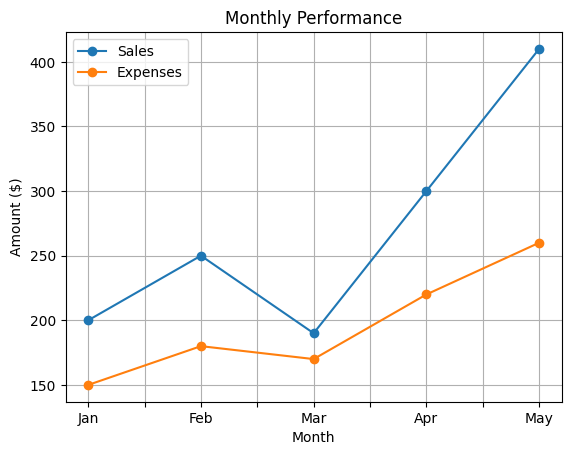

🔹 Step 2: Bar Plot - Sales vs Expenses


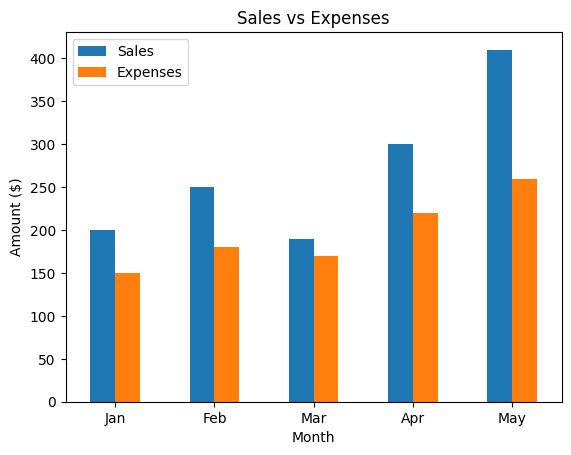

🔹 Step 3: Stacked Bar Plot


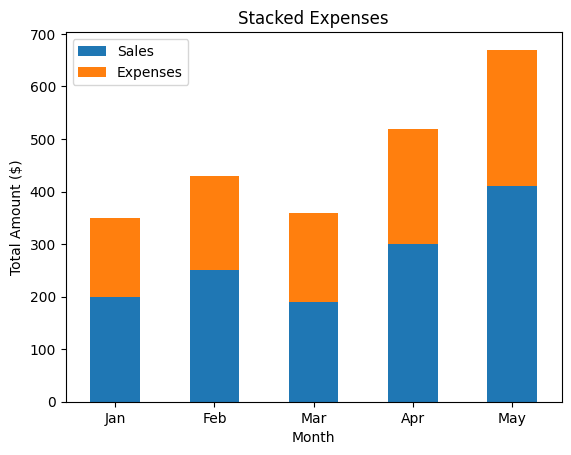

🔹 Step 4: Pie Chart - Sales Share


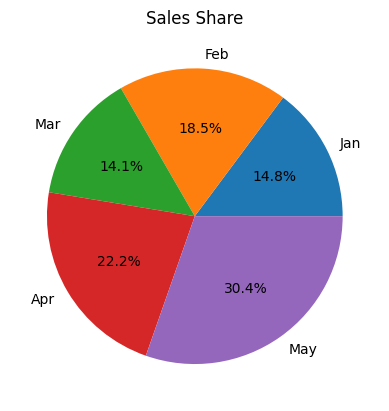

"\n| Plot Type         | `kind=` value         | Use for                         |\n| ----------------- | --------------------- | ------------------------------- |\n| Line (default)    | `'line'`              | Trends over time                |\n| Bar               | `'bar'`               | Category comparison             |\n| Stacked Bar       | `'bar', stacked=True` | Cumulative category values      |\n| Pie (Series only) | `'pie'`               | Proportional representation     |\n| Histogram         | `'hist'`              | Distribution of a single column |\n| Boxplot           | `'box'`               | Statistical summary             |\n| Area              | `'area'`              | Cumulative trends               |\n| Scatter           | `'scatter'`           | Relationships (x vs. y)         |\n"

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# ─────────────────────────────────────────────
# Sample Data
# ─────────────────────────────────────────────
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May'],
    'Sales': [200, 250, 190, 300, 410],
    'Expenses': [150, 180, 170, 220, 260]
}
df = pd.DataFrame(data).set_index('Month')

print("🔹 DataFrame:")
print(df, "\n")

# ─────────────────────────────────────────────
# 1. Line Plot
# ─────────────────────────────────────────────
print("🔹 Step 1: Line Plot - Sales & Expenses over Months")
df.plot(kind='line', title='Monthly Performance', marker='o')
plt.ylabel("Amount ($)")
plt.grid(True)
plt.show()

# ─────────────────────────────────────────────
# 2. Bar Plot
# ─────────────────────────────────────────────
print("🔹 Step 2: Bar Plot - Sales vs Expenses")
df.plot(kind='bar', title='Sales vs Expenses')
plt.ylabel("Amount ($)")
plt.xticks(rotation=0)
plt.show()

# ─────────────────────────────────────────────
# 3. Stacked Bar Plot
# ─────────────────────────────────────────────
print("🔹 Step 3: Stacked Bar Plot")
df.plot(kind='bar', stacked=True, title='Stacked Expenses')
plt.ylabel("Total Amount ($)")
plt.xticks(rotation=0)
plt.show()

# ─────────────────────────────────────────────
# 4. Pie Chart (on Series only)
# ─────────────────────────────────────────────
print("🔹 Step 4: Pie Chart - Sales Share")
df['Sales'].plot(kind='pie', autopct='%1.1f%%', title='Sales Share')
plt.ylabel('')
plt.show()
'''
| Plot Type         | `kind=` value         | Use for                         |
| ----------------- | --------------------- | ------------------------------- |
| Line (default)    | `'line'`              | Trends over time                |
| Bar               | `'bar'`               | Category comparison             |
| Stacked Bar       | `'bar', stacked=True` | Cumulative category values      |
| Pie (Series only) | `'pie'`               | Proportional representation     |
| Histogram         | `'hist'`              | Distribution of a single column |
| Boxplot           | `'box'`               | Statistical summary             |
| Area              | `'area'`              | Cumulative trends               |
| Scatter           | `'scatter'`           | Relationships (x vs. y)         |
'''

# Exporting Data to CSV, Excel, JSON

In [30]:
# Export to CSV
df.to_csv('output.csv', index=False)
print(df)
#index=False avoids writing row indices. sep=';' can change the delimiter.
df.to_csv('sales_data.csv', index=False)
print('\n',df)

       Sales  Expenses
Month                 
Jan      200       150
Feb      250       180
Mar      190       170
Apr      300       220
May      410       260

        Sales  Expenses
Month                 
Jan      200       150
Feb      250       180
Mar      190       170
Apr      300       220
May      410       260


In [33]:
# Export to Excel
#df.to_excel('output.xlsx', index=False, sheet_name='Sheet1')

#df.to_excel('monthly_report.xlsx', index=False)
      #Requires openpyxl or xlsxwriter for .xlsx support.

In [36]:
#Export to JSON
df.to_json('output.json', orient='records', lines=True)
#orient='records': list of row dicts,  lines=True: newline-delimited JSON (good for large files)
print(df)
df.to_json('data.json', orient='records', lines=True)
print(df)

       Sales  Expenses
Month                 
Jan      200       150
Feb      250       180
Mar      190       170
Apr      300       220
May      410       260
       Sales  Expenses
Month                 
Jan      200       150
Feb      250       180
Mar      190       170
Apr      300       220
May      410       260


In [39]:
#Clipboard (Quick Copy-Paste)
df.to_clipboard(index=False) #df.to_clipboard(index=False)
print(df)

       Sales  Expenses
Month                 
Jan      200       150
Feb      250       180
Mar      190       170
Apr      300       220
May      410       260


# Practice Exercises (Review + Hands-on)

In [41]:
# Basic Operations
#1. Create a DataFrame:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 30, 35, 40, 22],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'HR'],
    'Salary': [50000, 60000, 65000, 62000, 52000]
}

df = pd.DataFrame(data)
print(df)

      Name  Age Department  Salary
0    Alice   25         HR   50000
1      Bob   30         IT   60000
2  Charlie   35    Finance   65000
3    David   40         IT   62000
4      Eva   22         HR   52000


In [42]:
#Accessing and Filtering Data

#Display rows where Department is IT:
print(df[df['Department'] == 'IT'])

#Show rows where Salary > 55000 and Age < 40:
print(df[(df['Salary'] > 55000) & (df['Age'] < 40)])

    Name  Age Department  Salary
1    Bob   30         IT   60000
3  David   40         IT   62000
      Name  Age Department  Salary
1      Bob   30         IT   60000
2  Charlie   35    Finance   65000


In [47]:
# + - Adding, Renaming, and Dropping Columns

# Add a new column "Bonus" = 10% of Salary:
df['Bonus'] = df['Salary'] * 0.10
print("Add a new column Bonus = 10% of Salary:",df)
#Rename column "Department" to "Dept":
df.rename(columns={'Department': 'Dept'}, inplace=True)
print("\n Rename column Department to Dept: ",df)
#Drop the column "Bonus":
df.drop('Bonus', axis=1, inplace=True)
print("\n Drop the column Bonus: ",df)

Add a new column Bonus = 10% of Salary:       Name  Age     Dept  Salary   Bonus
0    Alice   25       HR   50000  5000.0
1      Bob   30       IT   60000  6000.0
2  Charlie   35  Finance   65000  6500.0
3    David   40       IT   62000  6200.0
4      Eva   22       HR   52000  5200.0

 Rename column Department to Dept:        Name  Age     Dept  Salary   Bonus
0    Alice   25       HR   50000  5000.0
1      Bob   30       IT   60000  6000.0
2  Charlie   35  Finance   65000  6500.0
3    David   40       IT   62000  6200.0
4      Eva   22       HR   52000  5200.0

 Drop the column Bonus:        Name  Age     Dept  Salary
0    Alice   25       HR   50000
1      Bob   30       IT   60000
2  Charlie   35  Finance   65000
3    David   40       IT   62000
4      Eva   22       HR   52000


In [49]:
#Descriptive Statistics & Grouping

#Summary statistics of numeric columns:
print(df.describe())

#Average salary per department:
print("\n", df.groupby('Dept')['Salary'].mean())

             Age        Salary
count   5.000000      5.000000
mean   30.400000  57800.000000
std     7.300685   6496.152708
min    22.000000  50000.000000
25%    25.000000  52000.000000
50%    30.000000  60000.000000
75%    35.000000  62000.000000
max    40.000000  65000.000000

 Dept
Finance    65000.0
HR         51000.0
IT         61000.0
Name: Salary, dtype: float64


In [50]:
#Sorting, Merging & Pivot Tables

#Sort by Salary descending:
df.sort_values(by='Salary', ascending=False)
print(df)

#Create a pivot table:
pivot = pd.pivot_table(df, index='Dept', values='Salary', aggfunc='mean')
print("\n", pivot)

      Name  Age     Dept  Salary
0    Alice   25       HR   50000
1      Bob   30       IT   60000
2  Charlie   35  Finance   65000
3    David   40       IT   62000
4      Eva   22       HR   52000

           Salary
Dept            
Finance  65000.0
HR       51000.0
IT       61000.0


In [58]:
#Handling Missing Data

#Create missing data and fill it:
df.loc[1, 'Salary'] = None
print(df)
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())
print("\n", df)

      Name  Age     Dept   Salary
0    Alice   25       HR  50000.0
1      Bob   30       IT      NaN
2  Charlie   35  Finance  65000.0
3    David   40       IT  62000.0
4      Eva   22       HR  52000.0

       Name  Age     Dept   Salary
0    Alice   25       HR  50000.0
1      Bob   30       IT  57250.0
2  Charlie   35  Finance  65000.0
3    David   40       IT  62000.0
4      Eva   22       HR  52000.0


In [61]:
#Export the DataFrame
#Export to CSV and Excel:
df.to_csv('review_output.csv', index=False)
#df.to_excel('review_output.xlsx', index=False)